# k-近邻算法基础（k-Nearest Neighbors）
* 实现简单
- 使用的数学知识少
- 适合入门

### 简单的来讲，KNN算法就是找出x最近邻的k的样本，看k样本中，与之特征相似样本的数量最多的类别，然后将x分入该类别。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
raw_data_X =  [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [10]:
x_train  = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [12]:
x_train

array([[ 3.39353321,  2.33127338],
       [ 3.11007348,  1.78153964],
       [ 1.34380883,  3.36836095],
       [ 3.58229404,  4.67917911],
       [ 2.28036244,  2.86699026],
       [ 7.42343694,  4.69652288],
       [ 5.745052  ,  3.5339898 ],
       [ 9.17216862,  2.51110105],
       [ 7.79278348,  3.42408894],
       [ 7.93982082,  0.79163723]])

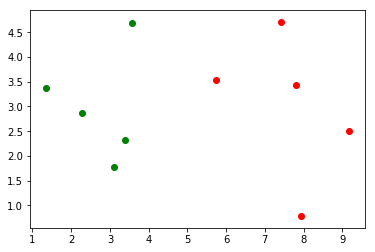

In [13]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color='g')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='r')
plt.show()

In [14]:
x = np.array([8.093607318, 3.365731514])

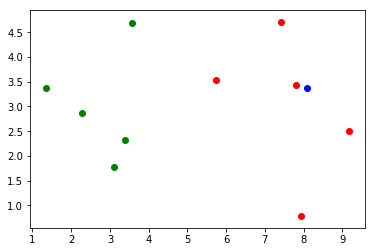

In [15]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color='g')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

### kNN的过程

In [16]:
distances = []

In [19]:
from math import sqrt
for x_trains in x_train:
    d = sqrt(np.sum((x_trains - x)**2))
    distances.append(d)

In [20]:
distances


[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [21]:
distances = [sqrt(np.sum((x_trains - x)**2)) for x_trains in x_train ]

In [22]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [23]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [24]:
nearest = np.argsort(distances)
k = 6
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [25]:
from collections import Counter
Counter(topK_y)

Counter({0: 1, 1: 5})

In [26]:
votes  = Counter(topK_y)
votes.most_common(1)

[(1, 5)]

In [29]:
votes.most_common(1)[0]

(1, 5)

## 封装算法

In [3]:
import numpy as np
import matplotlib.pyplot as plt

raw_data_X =  [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.093607318, 3.365731514])

In [4]:
%run KNN_function/KNN_packeted.py

In [5]:
KNN_classify(6, X_train, y_train, x)

1

# 回顾什么是机器学习
* 输入训练数据集，在机器学习算法训练生成模型，输入样例到模型之后得到预测的输出结果
- knn是一个不需要训练过程的算法
- knn是特殊的，是没有模型的算法
- 为了和其它算法统一，可以说训练集本身就是模型

### 使用scikit-learn中的kNN算法

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
KNN_fortrain = KNeighborsClassifier(n_neighbors = 6)
KNN_fortrain.fit(X_train, y_train)
x_predict = x.reshape(1, -1)
y_predict = KNN_fortrain.predict(x_predict)

y_predict

array([1])

### 封装kNN算法

In [13]:
%run KNN_function/demo.py

In [14]:
knn = KNNClassifier(k=6)

In [15]:
knn.fit(X_train, y_train)

KNN(k=6)

In [16]:
knn.predict(x_predict)

array([1])

### 训练数据集、测试数据集
* 训练得到的模型能够直接在真是环境中使用

#### 问题：
    * 模型很差，造成真是损失
    * 真实环境难以拿到真实的label
#### 训练数据集和测试数据集的分离：
    * 判断机器学习算法的性能
    * train test spilt

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

* 鸢尾花的数据集

In [19]:
iris = datasets.load_iris()

In [20]:
x = iris.data
y = iris.target

In [22]:
x.shape

(150, 4)

In [23]:
y.shape

(150,)

### train test split

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
shuffie_indexes = np.random.permutation(len(x))

In [26]:
shuffie_indexes

array([ 32,  15,   9,  14,  64, 117,  75,  16, 111, 132, 129,  26,  90,
        92,  22,  10,  61,  34,  38,  98,  33, 133,  20,  30,   1, 101,
        73, 109, 118, 134,   8,  25,  56,  76,  42, 140,  91, 105,  24,
        18, 122,  40, 121,  95, 115, 114, 127,   7, 104,  49,  94,  69,
        71,   5, 128,  13,  81,  86,  70,  44, 147,  51, 100, 141, 116,
        43,  74,  85,  77,  82,  47, 102,  53, 138, 106,  17, 107, 143,
         6, 108, 112, 142,  52, 126, 135,  68, 130,  12,  55,   4,  99,
       144, 125,  87,  31,  79,  60, 136,  21,  63,  97,  41,  50, 148,
        19, 103, 123,  66,  57,  59,  35,  78,  84,  48,  72,  39,  54,
        23,  28,  58,  83, 131,  88,  89,  27,  62, 110,  11,  67, 149,
       113,  45, 120, 139,   2, 146,  29, 124,  65,  93,   3, 145,  96,
        37,   0, 119,  80,  36,  46, 137])

In [27]:
test_ratio = 0.2
test_size = int(len(x)*test_ratio)

In [28]:
test_indexes = shuffie_indexes[:test_size]

In [29]:
test_indexes

array([ 32,  15,   9,  14,  64, 117,  75,  16, 111, 132, 129,  26,  90,
        92,  22,  10,  61,  34,  38,  98,  33, 133,  20,  30,   1, 101,
        73, 109, 118, 134])

In [30]:
train_indexes = shuffie_indexes[test_size:]

In [31]:
train_indexes

array([  8,  25,  56,  76,  42, 140,  91, 105,  24,  18, 122,  40, 121,
        95, 115, 114, 127,   7, 104,  49,  94,  69,  71,   5, 128,  13,
        81,  86,  70,  44, 147,  51, 100, 141, 116,  43,  74,  85,  77,
        82,  47, 102,  53, 138, 106,  17, 107, 143,   6, 108, 112, 142,
        52, 126, 135,  68, 130,  12,  55,   4,  99, 144, 125,  87,  31,
        79,  60, 136,  21,  63,  97,  41,  50, 148,  19, 103, 123,  66,
        57,  59,  35,  78,  84,  48,  72,  39,  54,  23,  28,  58,  83,
       131,  88,  89,  27,  62, 110,  11,  67, 149, 113,  45, 120, 139,
         2, 146,  29, 124,  65,  93,   3, 145,  96,  37,   0, 119,  80,
        36,  46, 137])

In [41]:
x_test = x[test_indexes]
y_test = y[test_indexes]

x_train = x[train_indexes]
y_train = y[train_indexes]

In [42]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [17]:
%run KNN_function/model_selection.py

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [48]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [49]:
%run KNN_function/demo.py

In [50]:
knn = KNNClassifier(k=3)

In [51]:
knn.fit(x_train, y_train)

KNN(k=3)

In [53]:
y_predict = knn.predict(x_test)

In [55]:
sum(y_predict == y_test)/len(y_test)

0.96666666666666667

### 分类准确度 accuracy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib

In [3]:
dig = datasets.load_digits()

In [4]:
dig.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
print(dig.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
X = dig.data
X.shape

(1797, 64)

In [7]:
y = dig.target

In [8]:
y.shape

(1797,)

In [9]:
dig.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1])

In [11]:
X[:10]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

In [12]:
some_digit = X[666]

In [13]:
y[666]

0

In [14]:
some_digit

array([  0.,   0.,   5.,  15.,  14.,   3.,   0.,   0.,   0.,   0.,  13.,
        15.,   9.,  15.,   2.,   0.,   0.,   4.,  16.,  12.,   0.,  10.,
         6.,   0.,   0.,   8.,  16.,   9.,   0.,   8.,  10.,   0.,   0.,
         7.,  15.,   5.,   0.,  12.,  11.,   0.,   0.,   7.,  13.,   0.,
         5.,  16.,   6.,   0.,   0.,   0.,  16.,  12.,  15.,  13.,   1.,
         0.,   0.,   0.,   6.,  16.,  12.,   2.,   0.,   0.])

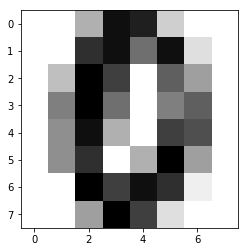

In [16]:
some_digit_image  = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio = 0.2)

In [20]:
%run KNN_function/demo.py 

In [21]:
knn = KNNClassifier(k=3)

In [22]:
knn.fit(X_train, y_train)

KNN(k=3)

In [23]:
y_predict = knn.predict(X_test)

In [24]:
np.sum(y_predict == y_test)

358

In [25]:
np.sum(y_predict == y_test)/len(y_test)

0.99721448467966578

### scikit-learn中的accuracy_score

In [30]:
from sklearn.model_selection import train_test_split



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 666)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_clif = KNeighborsClassifier(n_neighbors = 3)

In [39]:
knn_clif.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [40]:
y_predict = knn_clif.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_predict)

0.98888888888888893

In [44]:
knn_clif.score(X_test, y_test)

0.98888888888888893

### 超参数
* 超参数：在算法运行前需要决定的参数
* 模型参数：算法过程中学习的参数

    寻找好的参数：
        领域知识
        经验数值

In [9]:
import numpy as np
from sklearn import datasets

In [10]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
y_predict = knn.predict(X_test)

In [16]:
knn.score(X_test, y_test)

0.98888888888888893

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_predict, y_test)

0.98888888888888893

### 寻找最好的k


In [23]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

        
print("best_k = ", best_k)
print("best_k = ", best_score)

best_k =  3
best_k =  0.986111111111


### 考虑距离的权重

In [26]:
best_method = ''
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
    for k in range(1,11):
        knn = KNeighborsClassifier(n_neighbors = k, weights = method)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        if score>best_score:
            best_k = k
            best_method = method
            best_score = score

print('best_method=', best_method)
print('best_k = ', best_k)
print('best_score = ', best_score)

best_method= uniform
best_k =  3
best_score =  0.986111111111


### 曼哈顿距离：每个维度上的差值的绝对值之和
### 欧拉距离：每个维度上的差值的平方之和的平方根
### 闵可夫斯基距离： 每个维度上的距离绝对值的p次方之和的p次方根

##### 从明科夫斯基的中得出一个新的超参数：p


In [27]:
best_p = -1
best_score = 0.0
best_k = -1

for k in range(1,11):
    for p in range(1,6):
        knn = KNeighborsClassifier(n_neighbors = k, weights = "distance")
        knn.fit(X_train, y_train)
        score  = knn.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
            
print("best_p = ", best_p)
print("best_k = ", best_k)
print("best_score = ", best_score)

best_p =  1
best_k =  3
best_score =  0.986111111111


### 网格搜索   Grid Search

In [1]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors': [i for i in range(1,11)],
        'p': [i for i in range(1,6)]
    }
]

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
grid_search = GridSearchCV(knn, param_grid)

In [14]:
%%time
grid_search.fit(X_train , y_train)

Wall time: 3min 2s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
grid_search.best_score_


0.98747390396659707

In [18]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [19]:
knn = grid_search.best_estimator_


In [20]:
knn.predict(X_test)

array([1, 6, 2, 0, 2, 7, 0, 8, 6, 6, 3, 5, 8, 8, 7, 3, 0, 1, 0, 4, 7, 9, 7,
       4, 4, 9, 1, 3, 2, 1, 6, 9, 2, 1, 6, 0, 0, 5, 6, 4, 8, 8, 7, 1, 3, 8,
       5, 4, 4, 4, 3, 8, 1, 3, 5, 3, 0, 1, 9, 7, 4, 1, 3, 5, 8, 0, 6, 6, 4,
       2, 6, 5, 2, 6, 6, 2, 2, 7, 2, 0, 5, 6, 7, 6, 0, 8, 7, 9, 6, 6, 0, 6,
       5, 5, 0, 9, 6, 6, 7, 8, 3, 7, 1, 1, 5, 4, 8, 2, 5, 7, 8, 1, 5, 7, 5,
       3, 3, 2, 0, 3, 7, 4, 7, 5, 2, 9, 4, 4, 7, 8, 3, 3, 3, 6, 0, 6, 0, 8,
       6, 9, 8, 9, 9, 2, 9, 5, 0, 4, 0, 1, 4, 7, 2, 2, 0, 1, 1, 9, 9, 0, 6,
       9, 8, 7, 0, 0, 0, 8, 0, 7, 5, 5, 1, 6, 0, 3, 3, 8, 6, 7, 7, 4, 1, 7,
       9, 4, 1, 4, 4, 0, 3, 6, 2, 0, 0, 7, 1, 9, 7, 7, 8, 3, 4, 4, 4, 4, 1,
       4, 3, 1, 4, 3, 8, 9, 4, 1, 4, 1, 5, 6, 9, 8, 9, 6, 1, 7, 5, 9, 5, 5,
       3, 7, 1, 7, 3, 8, 1, 1, 2, 3, 5, 8, 4, 4, 3, 5, 1, 3, 8, 9, 5, 9, 0,
       7, 4, 2, 3, 5, 5, 5, 5, 4, 7, 8, 2, 2, 2, 7, 3, 4, 8, 1, 5, 6, 3, 4,
       0, 4, 4, 1, 9, 1, 3, 8, 0, 7, 7, 5, 1, 0, 8, 2, 0, 8, 7, 9, 5, 3, 1,
       0, 5,

In [21]:
knn.score(X_test, y_test)

0.98333333333333328

In [24]:
%%time
grid_search = GridSearchCV(knn, param_grid, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min


Wall time: 1min 27s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


### 更多的距离定义
* Cosine Similarity
* Adjusted Cosine Similarity

### 数据归一化  Feature Scaling
* 解决方案： 将所有的数据映射到统一尺度
* 最值归一化： 把所有的数据映射到0-1之间
    使用于分布有明显边界的情况；受到outlier影响较大
* 均值方差归一化：将所有数据归一到均值为0方差为1的分布中
    数据分布没有明显的边界；有可能存在极端数据值

In [25]:
import numpy as np
import matplotlib.pyplot as plt

##### 最值归一化

In [26]:
x = np.random.randint(0, 100, size = 100)

In [27]:
x

array([73, 40, 96, 85,  3, 91, 90, 55, 20, 51, 62, 41, 94, 58, 20, 85, 56,
       63, 21, 29, 84, 89, 53, 79, 40, 28, 22, 55,  4, 59, 65, 18, 45, 25,
       59, 61, 43, 64, 67, 78, 27, 95, 81, 32, 74, 88, 73, 31, 59, 48, 22,
       86, 45, 74, 85, 39, 59, 27, 59, 87, 15, 73, 14, 28, 62, 44, 96, 73,
       33, 15, 85, 59, 78, 44, 31, 34, 39, 35, 80, 64,  8, 44,  3, 69, 84,
       83, 75, 47, 88, 31, 77, 40, 10, 45,  4, 67, 70, 44, 97,  8])

In [28]:
(x-np.min(x)) / (np.max(x) - np.min(x))

array([ 0.74468085,  0.39361702,  0.9893617 ,  0.87234043,  0.        ,
        0.93617021,  0.92553191,  0.55319149,  0.18085106,  0.5106383 ,
        0.62765957,  0.40425532,  0.96808511,  0.58510638,  0.18085106,
        0.87234043,  0.56382979,  0.63829787,  0.19148936,  0.27659574,
        0.86170213,  0.91489362,  0.53191489,  0.80851064,  0.39361702,
        0.26595745,  0.20212766,  0.55319149,  0.0106383 ,  0.59574468,
        0.65957447,  0.15957447,  0.44680851,  0.23404255,  0.59574468,
        0.61702128,  0.42553191,  0.64893617,  0.68085106,  0.79787234,
        0.25531915,  0.9787234 ,  0.82978723,  0.30851064,  0.75531915,
        0.90425532,  0.74468085,  0.29787234,  0.59574468,  0.4787234 ,
        0.20212766,  0.88297872,  0.44680851,  0.75531915,  0.87234043,
        0.38297872,  0.59574468,  0.25531915,  0.59574468,  0.89361702,
        0.12765957,  0.74468085,  0.11702128,  0.26595745,  0.62765957,
        0.43617021,  0.9893617 ,  0.74468085,  0.31914894,  0.12

In [29]:
x = np.random.randint(0, 100, (50,2))

In [30]:
x[:10, :
 ]

array([[ 7, 58],
       [48, 87],
       [79, 24],
       [48,  9],
       [62, 79],
       [85, 48],
       [63, 44],
       [57, 23],
       [27, 96],
       [93, 77]])

In [31]:
x = np.array(x, dtype = float)

In [32]:
x

array([[  7.,  58.],
       [ 48.,  87.],
       [ 79.,  24.],
       [ 48.,   9.],
       [ 62.,  79.],
       [ 85.,  48.],
       [ 63.,  44.],
       [ 57.,  23.],
       [ 27.,  96.],
       [ 93.,  77.],
       [  9.,  27.],
       [ 21.,  46.],
       [ 65.,  90.],
       [ 54.,  67.],
       [ 31.,  73.],
       [ 14.,   4.],
       [ 83.,  37.],
       [ 94.,   8.],
       [ 38.,  42.],
       [ 10.,  85.],
       [ 56.,  48.],
       [ 33.,  24.],
       [ 28.,   2.],
       [ 81.,  11.],
       [ 49.,  36.],
       [ 11.,  52.],
       [ 29.,  19.],
       [ 34.,  60.],
       [ 20.,  22.],
       [ 62.,  83.],
       [ 17.,  79.],
       [ 65.,  41.],
       [ 69.,  58.],
       [ 97.,  48.],
       [ 22.,   5.],
       [ 11.,  55.],
       [ 24.,  27.],
       [ 75.,  87.],
       [ 11.,  44.],
       [ 55.,  54.],
       [ 81.,  62.],
       [ 28.,  67.],
       [ 83.,   7.],
       [ 53.,  84.],
       [ 60.,  50.],
       [ 38.,  53.],
       [ 67.,  87.],
       [ 63.,

In [35]:
x[:,0] = (x[:,0]-np.min(x[:,0])) / (np.max(x[:,0])-np.min(x[:,0]))

In [37]:
x[:10,0]

array([ 0.        ,  0.45555556,  0.8       ,  0.45555556,  0.61111111,
        0.86666667,  0.62222222,  0.55555556,  0.22222222,  0.95555556])

##### 均值方差归一化
* 不能解决数据偏值很大的数据

In [38]:
x2 =  np.random.randint(0, 100 ,(50,2))

In [39]:
x2 = np.array(x2, dtype = float)

In [45]:
x2[:,0] = (x2[:,0] - np.mean(x2[:,0]))/np.std(x2[:,0])

In [46]:
x2[:,1] = (x2[:,1] - np.mean(x2[:,1]))/np.std(x2[:,1])

In [48]:
x2

array([[ 0.73553579, -1.62474272],
       [ 0.32933506,  0.3003079 ],
       [-0.85802094,  0.93032446],
       [ 0.64179716, -0.39971051],
       [-1.3579603 , -0.85472248],
       [ 1.07924411, -0.57471511],
       [-1.26422167, -1.27473352],
       [ 0.70428958,  0.37030974],
       [-1.26422167,  1.35033551],
       [-1.13923683,  0.54531434],
       [-0.85802094, -0.74971971],
       [ 0.98550548,  1.03532722],
       [-0.04561947,  0.40531066],
       [-1.26422167, -0.01470039],
       [-0.54555883,  1.14032999],
       [ 0.07936537,  1.17533091],
       [-1.0454982 ,  0.4753125 ],
       [ 1.48544484, -1.62474272],
       [-0.85802094,  1.31533459],
       [-1.3579603 , -0.71471879],
       [-0.98300578, -0.25970683],
       [-1.32671409,  1.59534195],
       [ 0.67304337,  1.38533643],
       [ 1.32921379, -0.36470959],
       [ 1.26672137,  0.93032446],
       [ 1.11049032,  0.02030053],
       [-0.70178989, -1.30973444],
       [ 1.26672137,  1.03532722],
       [-1.51419136,

In [49]:
plt.scatter(x2[:,0], x2[:,1])

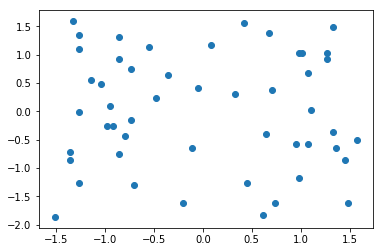

In [50]:
plt.show()

In [52]:
np.mean(x2[:,0])

-4.4408920985006264e-17

In [54]:
np.std(x2[:, 1])

0.99999999999999989

### 对测试数据集进行归一化

* ‘测试数据集是模拟真实环境’
     真实环境很有可能无法得到所有测试数据的均值和方差
     对数据的归一化也是算法的一部分
     所以测试数据进行归一化时，需要用到测试数据的均值和方差
     (X_test - mean_train)/std_train
     要保存测试数据值的均值和方差

In [86]:
from sklearn import datasets

In [87]:
iris = datasets.load_iris()

In [88]:
X = iris.data

In [89]:
y = iris.target

In [103]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [91]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(iris.data , iris.target)

In [108]:
X_train

array([[ 6.6,  2.9,  4.6,  1.3],
       [ 5.7,  2.5,  5. ,  2. ],
       [ 5.5,  2.4,  3.7,  1. ],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 6.7,  3. ,  5. ,  1.7],
       [ 6.2,  2.9,  4.3,  1.3],
       [ 6.4,  2.8,  5.6,  2.2],
       [ 6.5,  2.8,  4.6,  1.5],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 5.1,  2.5,  3. ,  1.1],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 6.3,  2.3,  4.4,  1.3],
       [ 7.4,  2.8,  6.1,  1.9],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 5.9,  3. ,  5.1,  1.8],
       [ 5.1,  3.8,  1.6,  0.2],
       [ 5.7,  2.6,  3.5,  1. ],
       [ 5.5,  2.6,  4.4,  1.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 6.9,  3.1,  5.4,  2.1],
       [ 6.8,  3. ,  5.5,  2.1],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 6.2,  3.4,  5.4,  2.3],
       [ 4.5,  2.3,  1.3,  0.3],
       [ 6.5,  3. ,  5.5,  1.8],
       [ 7.2,  3. ,  5.8,  1.6],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 5.8,  2.7,  4.1,  1. ],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5

#### scikit-learn中的standardScaler

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
stand = StandardScaler()

In [112]:
stand.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
stand.mean_

array([ 5.84642857,  3.05892857,  3.72410714,  1.18660714])

In [114]:
stand.scale_

array([ 0.80322215,  0.43600327,  1.75464921,  0.76198701])

In [115]:
stand.transform(X_train)

array([[ 0.93818557, -0.36451234,  0.49918403,  0.14881206],
       [-0.18230146, -1.28193665,  0.72714982,  1.06746289],
       [-0.43129858, -1.51129273, -0.01373901, -0.24489544],
       [ 0.81368701, -0.13515626,  0.84113272,  1.06746289],
       [ 1.06268413, -0.13515626,  0.72714982,  0.67375539],
       [ 0.44019133, -0.36451234,  0.32820968,  0.14881206],
       [ 0.68918845, -0.59386842,  1.06909851,  1.32993456],
       [ 0.81368701, -0.59386842,  0.49918403,  0.41128373],
       [-0.30680002, -0.13515626,  0.44219258,  0.41128373],
       [-0.92929282, -1.28193665, -0.41267915, -0.11365961],
       [-1.55178561,  0.78226805, -1.32454233, -1.16354627],
       [ 0.56468989, -1.7406488 ,  0.38520113,  0.14881206],
       [ 1.93417405, -0.59386842,  1.35405575,  0.93622706],
       [ 0.31569278, -0.36451234,  0.55617548,  0.28004789],
       [ 0.06669566, -0.13515626,  0.78414127,  0.80499123],
       [-0.92929282,  1.69969236, -1.21055943, -1.2947821 ],
       [-0.18230146, -1.

In [116]:
X_train = stand.transform(X_train)

In [117]:
X_train

array([[ 0.93818557, -0.36451234,  0.49918403,  0.14881206],
       [-0.18230146, -1.28193665,  0.72714982,  1.06746289],
       [-0.43129858, -1.51129273, -0.01373901, -0.24489544],
       [ 0.81368701, -0.13515626,  0.84113272,  1.06746289],
       [ 1.06268413, -0.13515626,  0.72714982,  0.67375539],
       [ 0.44019133, -0.36451234,  0.32820968,  0.14881206],
       [ 0.68918845, -0.59386842,  1.06909851,  1.32993456],
       [ 0.81368701, -0.59386842,  0.49918403,  0.41128373],
       [-0.30680002, -0.13515626,  0.44219258,  0.41128373],
       [-0.92929282, -1.28193665, -0.41267915, -0.11365961],
       [-1.55178561,  0.78226805, -1.32454233, -1.16354627],
       [ 0.56468989, -1.7406488 ,  0.38520113,  0.14881206],
       [ 1.93417405, -0.59386842,  1.35405575,  0.93622706],
       [ 0.31569278, -0.36451234,  0.55617548,  0.28004789],
       [ 0.06669566, -0.13515626,  0.78414127,  0.80499123],
       [-0.92929282,  1.69969236, -1.21055943, -1.2947821 ],
       [-0.18230146, -1.

In [127]:
X_test_t = stand.transform(X_test)

In [128]:
X_test

array([[ 0.68918845,  0.3235559 ,  0.44219258,  0.41128373],
       [ 0.68918845,  0.09419982,  1.01210706,  0.80499123],
       [ 0.31569278, -0.59386842,  0.15723534,  0.14881206],
       [-1.55178561,  0.09419982, -1.26755088, -1.2947821 ],
       [-0.92929282,  1.69969236, -1.03958508, -1.03231044],
       [ 0.56468989,  0.78226805,  1.06909851,  1.59240622],
       [ 0.06669566, -0.13515626,  0.27121823,  0.41128373],
       [ 0.56468989, -0.59386842,  0.78414127,  0.41128373],
       [-0.92929282,  1.01162413, -1.32454233, -1.16354627],
       [ 1.31168125,  0.09419982,  0.67015837,  0.41128373],
       [ 0.56468989, -1.28193665,  0.72714982,  0.93622706],
       [-0.55579714,  1.47033628, -1.26755088, -1.2947821 ],
       [-0.43129858, -1.7406488 ,  0.15723534,  0.14881206],
       [-0.43129858, -1.51129273,  0.04325244, -0.11365961],
       [ 2.55666684,  1.69969236,  1.5250301 ,  1.06746289],
       [-1.05379138,  0.55291197, -1.32454233, -1.2947821 ],
       [-1.17828994, -1.

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [131]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [132]:
knn.score(X_test, y_test)

0.86842105263157898

* knn 解决分类问题   可以解决多分类问题   思想简单，效果强大
 knn可以解决回归问题：KNeighborsRegressor
* **缺点**
*     **最大缺点：**效率低下。如果训练集有m个样本，n个特征，则预测一个新的数据，需要O(m*n)
*     **优化，使用树的结构：**KD-Tree,Ball-Tree

* **缺点二：**高度数据相关
* **缺点三：**预测结果不具有可解释性

* （维数灾难）随着维度的增加，看似相近的两个点之间的距离越来越大
* 降维pca

In [ ]:
import numpy as np